In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./submission.csv
./Project_1.ipynb
./.ipynb_checkpoints/Project_1-checkpoint.ipynb
./.ipynb_checkpoints/submission-checkpoint.csv
./data/test.csv
./data/titanic.csv
./data/.ipynb_checkpoints/test-checkpoint.csv
./data/.ipynb_checkpoints/titanic-checkpoint.csv


In [41]:
train = pd.read_csv("./data/titanic.csv")
test = "./data/test.csv"
train = train.drop(['Ticket'], axis=1)
train = train.drop(['Embarked'], axis=1)
train = train.drop(['Parch'], axis=1)
train["Age"].fillna(train["Age"].median(), inplace=True)
train["Fare"].fillna(train["Fare"].median(), inplace=True)
train.shape
train.info()
train.isnull().sum()
train.head(891)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,30.0000,C148


In [42]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = train.loc[train.Sex == "male"]["Survived"]
rate_men = sum(men)/len(men)



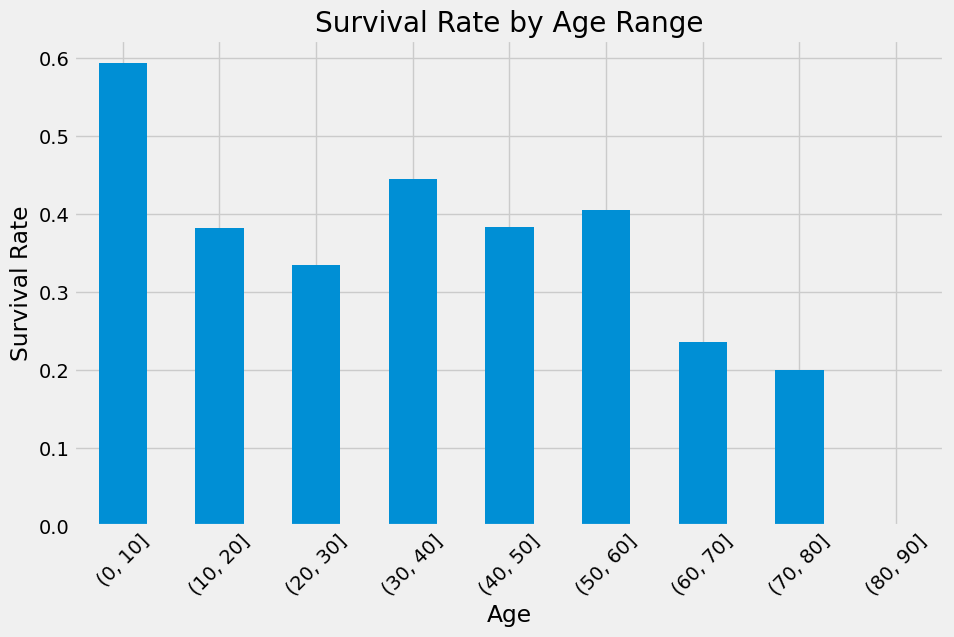

In [43]:
age_survival = train.groupby(pd.cut(train['Age'], bins=[0,10,20,30,40,50,60,70,80,90]))['Survived'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
age_survival.plot(kind='bar', ax=ax)
ax.set_title('Survival Rate by Age Range')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

An ML model that must be trained on the titanic data set to be able to predict who would survive the incident. We will be using data from the titanic which contains information of who survived and who didn't to find patterns and predict the output. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The Data was provided to me.

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

data has 891 entries and 12 columns. 74% of woman survived while only 19% of men survived
gender age and 

# 4.Prepare the Data


Apply any data transformations and explain what and why


i dropped ticket, embarked, and parch because they were weren't important and filled in empty spaces with zero. The best predictors were Age, Sex, SibSP, and Fare. 

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


I decided to use the Random Forest Classifier model because I researched and it was the best for this project

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


I adjusted the random state and the number of estimators giving me an extra 6% in accuracy

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


The goal of the project was to predict who would of survived on the titanic by identifiying 
patterns using Machine Learning. First I cleaned up the data by removing unneseccary data 
and imputing empty values. Then I graphed out the data just to see what would be a good indicator 
of survival. Next, I decided to use the Random Forest Classifier because after my research 
I learnt that this was the best model for this project. My inital model accuracy hovered around 
the 78% range but after adjusting values I got up to the current 84% range. 

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [44]:
def infrence(train):
    y = train["Survived"]
    features = ["Age", "Sex", "SibSp", "Fare"]
    x = pd.get_dummies(train[features])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
    model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=4)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    return f"Model Accuracy: {accuracy*100:.3f}%"
print(infrence(train))

Model Accuracy: 84.358%
